In [20]:
import pandas as pd
import swifter

In [21]:
import numpy as np

In [22]:
import seaborn as sns

In [23]:
def describe_category(dataframe, column_name):
    """
    """
    value_count = df_train[column_name].value_counts().sort_index()
    df_value_count = pd.DataFrame({column_name: value_count.index, "count": value_count.values})
    sum_class = df_value_count["count"].sum()
    df_value_count["percentage"] = df_value_count["count"]/sum_class*100
    display(df_value_count)
    
    # fig, ax = plt.subplots(figsize = (1,7)
    ax = sns.barplot(data=df_value_count, x=column_name, y="count")
    ax.set_ylim(0, df_value_count["count"].max()*1.2)
    for p, percentage in zip(ax.patches, list(df_value_count["percentage"])):
        ax.annotate("%.2f" % percentage +" %", (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')  #vertical bars


In [24]:
df_train = pd.read_csv("../../data/train.csv")

In [25]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [26]:
df_train[["Cabin"]].value_counts()

Cabin 
C19828    6
C11139    5
C13699    5
C14534    5
C9485     5
         ..
B2861     1
B2858     1
B2856     1
B2854     1
T9848     1
Length: 26992, dtype: int64

There are text, A, B, C, T, whatever is this might helpful

In [27]:
def extract_cabin_type(cabin_text):
    if cabin_text:
        cabin_type = cabin_text[0]
        return cabin_type
    else:
        return "UNK"

In [33]:
df_train["Cabin_type"] = df_train["Cabin"].fillna("U").swifter.apply(extract_cabin_type)

Pandas Apply:   0%|          | 0/100000 [00:00<?, ?it/s]

,Cabin_type,count,percentage
0,A,6307,6.307
1,B,7439,7.439
2,C,11825,11.825
3,D,3637,3.637
4,E,1749,1.749
5,F,663,0.663
6,G,482,0.482
7,T,32,0.032
8,U,67866,67.866


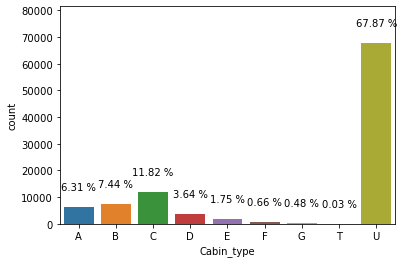

In [34]:
describe_category(df_train, "Cabin_type")

In [30]:
67.87

67.87

## Ticket

In [35]:
import re
word1 = " ".join(re.findall("[a-zA-Z]+", st))

NameError: name 'st' is not defined

In [47]:
import re
def extract_text(text):
    result = ""
    if text:
        text = str(text)
        result = "".join(re.findall("[a-zA-Z]+", text))
    else:
        result = "NULL"
    if result == "":
        result = "NO_TEXT"
    return result

In [48]:
extract_text("")

'NULL'

In [49]:
extract_text(1)

'NO_TEXT'

In [50]:
extract_text(None)

'NULL'

In [51]:
df_train["Ticket_type"] = df_train["Ticket"].fillna("UNK").swifter.apply(extract_text)

Pandas Apply:   0%|          | 0/100000 [00:00<?, ?it/s]

,Ticket_type,count,percentage
0,A,6087,6.087
1,AQ,103,0.103
2,AS,44,0.044
3,C,220,0.220
4,CA,2448,2.448
5,CASOTON,37,0.037
6,FC,296,0.296
7,FCC,577,0.577
8,Fa,54,0.054
9,LP,56,0.056


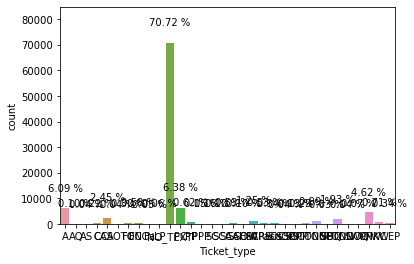

In [52]:
describe_category(df_train, "Ticket_type")